<a href="https://colab.research.google.com/github/KodumuruRaja/Feature-Selection/blob/main/Feature-Selection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif,f_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile

In [ ]:
data=pd.read_csv("/content/train.csv")

In [ ]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0


In [ ]:
x=data.drop('TARGET',axis=1)
y=data['TARGET']

In [ ]:
x.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace2    1
saldo_medio_var44_hace3    1
saldo_medio_var44_ult1     1
saldo_medio_var44_ult3     1
var38                      1
Length: 370, dtype: int64

In [ ]:
y.isnull().sum()

1

In [ ]:
x.shape, y.shape

((34925, 370), (34925,))

In [ ]:
x.dropna(inplace=True)

In [ ]:
y.dropna(inplace=True)

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
x.isnull().any()

ID                         False
var3                       False
var15                      False
imp_ent_var16_ult1         False
imp_op_var39_comer_ult1    False
                           ...  
saldo_medio_var44_hace2    False
saldo_medio_var44_hace3    False
saldo_medio_var44_ult1     False
saldo_medio_var44_ult3     False
var38                      False
Length: 370, dtype: bool

In [ ]:
y.isnull().any()

False

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

# **Remove Constant, Quasi Constant, and Correlated Features**

In [ ]:
cf=VarianceThreshold(threshold=0.01)
cf.fit(x_train)
x_train_f=cf.transform(x_train)
x_test_f=cf.transform(x_test)

In [ ]:
x_train_f.shape,x_test_f.shape

((27939, 251), (6985, 251))

In [ ]:
#remove Duplicate Features
x_train_T=x_train_f.T
x_test_T=x_test_f.T

In [ ]:
x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)

In [ ]:
x_train_T.duplicated().sum()

18

In [ ]:
df=x_train_T.duplicated()

In [ ]:
ftk=[not index for index in df]
x_train_unique=x_train_T[ftk].T
x_test_unique=x_test_T[ftk].T

In [ ]:
x_train_unique.shape,x_test_unique.shape

((27939, 233), (6985, 233))

# **Now do F-Test**

In [ ]:
sel=f_classif(x_train_unique,y_train)

In [ ]:
sel

(array([2.52327556e+00, 1.84797335e+00, 2.55958975e+02, 2.85223758e-01,
        8.20505884e-01, 8.87263272e-02, 2.04011536e-01, 2.04312166e-03,
        1.01402233e+01, 1.68132616e+01, 2.61461242e-01, 6.78096657e-01,
        9.42514218e-02, 1.69999931e+01, 1.17281248e+01, 1.18511779e+01,
        1.89564838e+01, 1.33676290e+01, 1.18178359e+01, 1.34241028e-01,
        7.10618069e-01, 8.42379580e+00, 4.40484109e+02, 2.35922432e+01,
        7.62375515e+00, 5.28619546e+01, 3.55102411e+01, 5.43206714e+01,
        4.29018549e+01, 4.13986377e+01, 5.28287084e+01, 1.98279886e+01,
        2.80887780e+01, 2.82435391e+01, 8.09548247e+00, 4.96102330e+00,
        8.82937324e+00, 5.97720922e+00, 5.88737301e+02, 7.28591572e-01,
        5.96178066e-01, 2.71654120e+01, 2.62220377e+01, 7.10618069e-01,
        3.44222953e+00, 1.88871581e+02, 5.86177234e+00, 4.30573550e+02,
        2.34521559e+01, 7.62375515e+00, 5.00507667e+01, 3.49507773e+01,
        5.05252691e+01, 4.24634416e+01, 4.13683209e+01, 9.719553

In [ ]:
pv=pd.Series(sel[1])
pv.index=x_train_unique.columns
pv.sort_values(ascending=True,inplace=True)

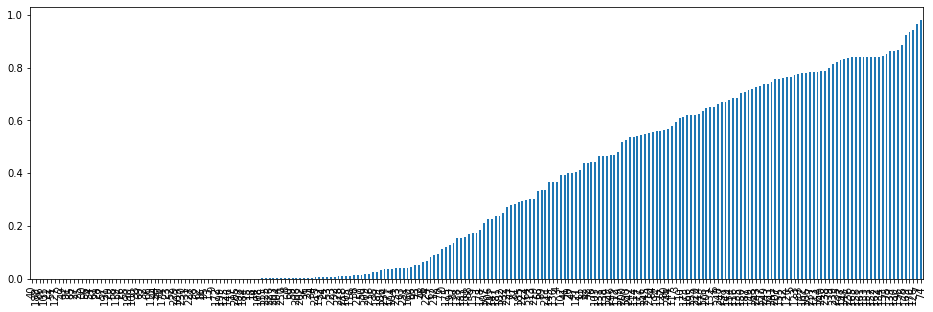

In [ ]:
pv.plot.bar(figsize=(16,5))

In [ ]:
pv

40     1.015127e-128
188    2.190059e-125
86     3.818599e-113
101    2.494947e-105
22      4.772035e-97
           ...      
169     9.221765e-01
170     9.343932e-01
126     9.437214e-01
7       9.639475e-01
74      9.809780e-01
Length: 233, dtype: float64

In [ ]:
pv=pv[pv<0.05]

In [ ]:
pv.index

Int64Index([ 40, 188,  86, 101,  22,  51, 127,   2,  49,  91,  85,  27,  25,
             30,  56,  54,  61,  28,  57, 191,  29,  58, 119,  26,  55, 190,
            100,  33,  69,  32,  68, 111,  44,  46, 174,  23,  52, 229, 109,
            230,  31, 227,  98,  62,  16,  95,  13,   9, 172, 199, 125, 146,
             17, 205, 198, 184,  15,  18,  14, 108, 115, 225, 226, 203, 204,
            250,   8,  60,  59, 208, 202,  36,  21,  34, 215, 192,  24,  53,
            223,  92, 228, 218, 105, 110,  38, 217,  50, 209, 216,  35, 189,
            186, 234, 171, 104, 233,  63, 231, 160,  66],
           dtype='int64')

In [ ]:
x_train_p=x_train_unique[pv.index]
x_test_p=x_test_unique[pv.index]

# **Build the Classifiers and compare the Performance**

In [ ]:
def run_randomForest(x_train,x_test,y_train,y_test):
  clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  print('Accuracy',accuracy_score(y_test,y_pred))

In [ ]:
%%time
run_randomForest(x_train_p,x_test_p,y_train,y_test)

Accuracy 0.9549033643521833
CPU times: user 8.04 s, sys: 38.5 ms, total: 8.08 s
Wall time: 4.3 s


In [ ]:
%%time
run_randomForest(x_train,x_test,y_train,y_test)

Accuracy 0.960486757337151
CPU times: user 13.3 s, sys: 57.8 ms, total: 13.4 s
Wall time: 7.02 s
